In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("fareselmenshawii/face-detection-dataset")

# print("Path to dataset files:", path)

Using Colab cache for faster access to the 'face-detection-dataset' dataset.
Path to dataset files: /kaggle/input/face-detection-dataset


In [27]:
#!uv pip install ultralytics
from ultralytics import YOLO
import torch
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os
import shutil



In [5]:
# # Путь к датасету
# data_root = '/kaggle/input/face-detection-dataset'

# print("📂 Структура датасета:")
# for root, dirs, files in os.walk(data_root):
#     level = root.replace(data_root, '').count(os.sep)
#     indent = ' ' * 2 * level
#     print(f'{indent}📁 {os.path.basename(root)}/')

#     # Показываем количество файлов в папках
#     if not dirs:
#         subitems = len(os.listdir(root))
#         print(f'{indent}   └── {subitems} файлов')

📂 Структура датасета:
📁 face-detection-dataset/
  📁 labels2/
     └── 16733 файлов
  📁 labels/
    📁 val/
       └── 3347 файлов
    📁 train/
       └── 13386 файлов
  📁 images/
    📁 val/
       └── 3347 файлов
    📁 train/
       └── 13386 файлов


In [8]:
# # Копируем из Kaggle input в рабочую папку Colab
# src = '/kaggle/input/face-detection-dataset'
# dst = '/content/data'

# print("📦 Копирование датасета...")
# if os.path.exists(dst):
#     shutil.rmtree(dst)
# shutil.copytree(src, dst)
# print("✅ Копирование завершено!")

# # Проверка структуры
# print("\n📂 Структура:")
# print(f"   images/train: {len(os.listdir('/content/data/images/train'))} файлов")
# print(f"   images/val: {len(os.listdir('/content/data/images/val'))} файлов")
# print(f"   labels/train: {len(os.listdir('/content/data/labels/train'))} файлов")
# print(f"   labels/val: {len(os.listdir('/content/data/labels/val'))} файлов")

📦 Копирование датасета...
✅ Копирование завершено!

📂 Структура:
   images/train: 13386 файлов
   images/val: 3347 файлов
   labels/train: 13386 файлов
   labels/val: 3347 файлов


In [9]:
# yaml_content = """path: /content/data
# train: images/train
# val: images/val

# nc: 1
# names: ['face']
# """

# with open('/content/data.yaml', 'w') as f:
#     f.write(yaml_content)

# print("✅ data.yaml создан!")

✅ data.yaml создан!


In [5]:
device = 'cuda'

In [6]:
device

'cuda'

In [7]:
model = YOLO('yolo26m.pt')

In [12]:
# # Проверяем структуру
# print("=== Проверка путей ===")
# print(f"Train images: {len(os.listdir('../data/images/train'))} файлов")
# print(f"Val images: {len(os.listdir('../data/images/val'))} файлов")
# print(f"labels2: {len(os.listdir('../data/labels2'))} файлов")

In [ ]:
# # === Пути ===
# data_root = '../data'
# images_train = os.path.join(data_root, 'images/train')
# images_val = os.path.join(data_root, 'images/val')
# labels_src = os.path.join(data_root, 'labels2')
# labels_train = os.path.join(data_root, 'labels2/train')
# labels_val = os.path.join(data_root, 'labels2/val')

# # === 1. Создаём папки для меток ===
# os.makedirs(labels_train, exist_ok=True)
# os.makedirs(labels_val, exist_ok=True)

# # === 2. Функция распределения меток ===
# def distribute_labels(image_folder, label_dest_folder):
#     moved = 0
#     for img_name in os.listdir(image_folder):
#         if not img_name.lower().endswith(('.jpg', '.png', '.jpeg')):
#             continue

#         # Получаем имя без расширения
#         base_name = os.path.splitext(img_name)[0]
#         label_file = f"{base_name}.txt"

#         src = os.path.join(labels_src, label_file)
#         dst = os.path.join(label_dest_folder, label_file)

#         if os.path.exists(src):
#             shutil.move(src, dst)
#             moved += 1

#     return moved

# # === 3. Запуск ===
# print("🔄 Распределение меток...")
# train_count = distribute_labels(images_train, labels_train)
# val_count = distribute_labels(images_val, labels_val)

# print(f"✅ Train меток: {train_count}")
# print(f"✅ Val меток: {val_count}")

# # === 4. Проверка ===
# print("\n📊 Итоговая структура:")
# print(f"   images/train: {len(os.listdir(images_train))} файлов")
# print(f"   images/val: {len(os.listdir(images_val))} файлов")
# print(f"   labels2/train: {len(os.listdir(labels_train))} файлов")
# print(f"   labels2/val: {len(os.listdir(labels_val))} файлов")

🔄 Распределение меток...
✅ Train меток: 0
✅ Val меток: 0

📊 Итоговая структура:
   images/train: 13386 файлов
   images/val: 3347 файлов
   labels2/train: 13386 файлов
   labels2/val: 3347 файлов


In [11]:
results = model.train(
    data='/content/data.yaml',
    epochs=30,
    imgsz=480,
    batch=16,
    device=device
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=480, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo26m.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

In [25]:
url = 'https://twizz.ru/wp-content/uploads/2023/12/1703847060_8c7dd922ad47494fc02c388e12c00eac.jpg'
results = model.predict(url, conf=0.5)


image 1/1 /content/1703847060_8c7dd922ad47494fc02c388e12c00eac.jpg: 256x480 2 faces, 60.2ms
Speed: 1.8ms preprocess, 60.2ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 480)


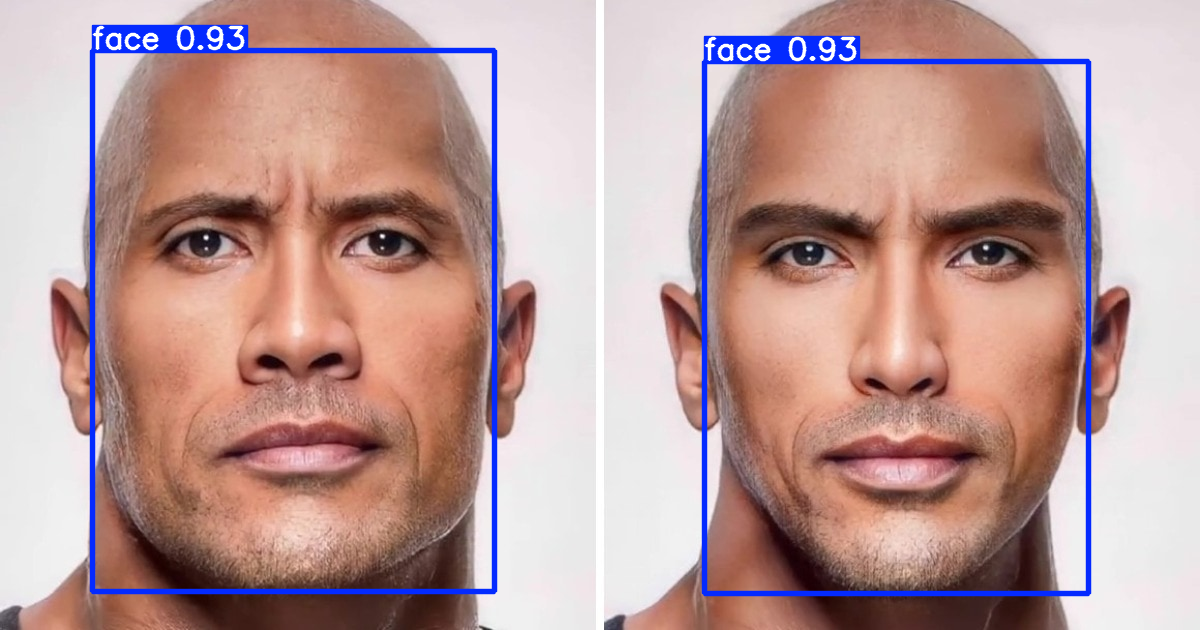

In [26]:
for result in results:
  boxes = result.boxes
  masks = result.masks
  keypoints = result.keypoints
  probs = result.probs
  obb = result.obb
  result.show()

✅ Лицо #1: уверенность 0.91
✅ Лицо #2: уверенность 0.85
✅ Лицо #3: уверенность 0.79

💾 Сохранено: output_blurred.jpg
📊 Всего лиц найдено: 3


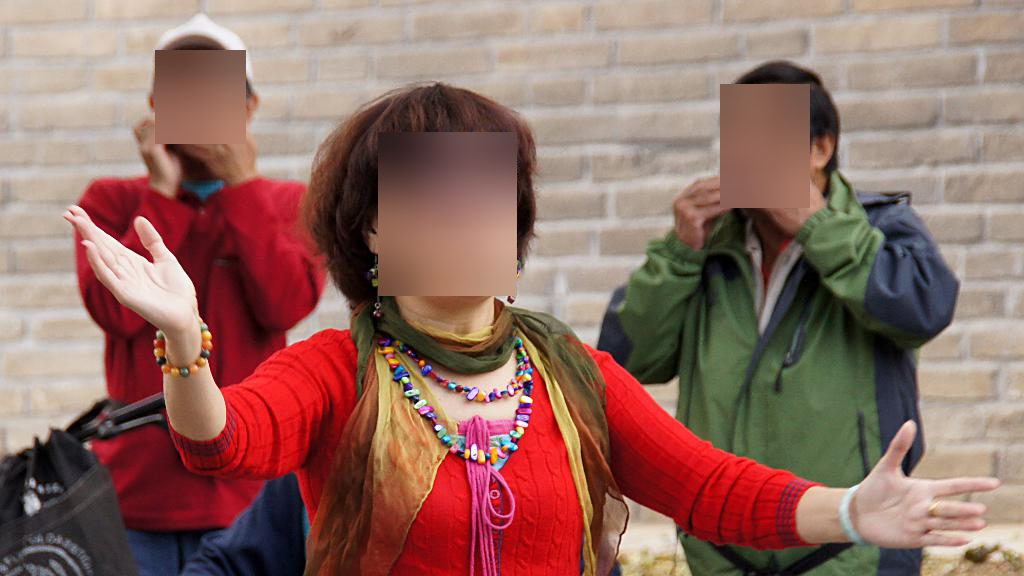

3

In [31]:
# 1. Загрузка твоей модели
model = YOLO('/content/runs/detect/train8/weights/best.pt')

# 2. Функция размытия лица
def blur_face(image, box):
    x1, y1, x2, y2 = map(int, box)
    face_roi = image[y1:y2, x1:x2]
    # Сильное Gaussian размытие
    blurred = cv2.GaussianBlur(face_roi, (99, 99), 30)
    image[y1:y2, x1:x2] = blurred
    return image

# 3. Обработка изображения
def process_image(image_path, output_path='output.jpg', conf=0.5):
    img = cv2.imread(image_path)
    if img is None:
        print(f"❌ Не удалось прочитать {image_path}")
        return

    # Детекция
    results = model(img, conf=conf, verbose=False)
    faces_count = 0

    for result in results:
        if result.boxes is not None:
            for box in result.boxes:
                bbox = box.xyxy[0].cpu().numpy()
                confidence = box.conf[0].cpu().numpy()
                print(f"✅ Лицо #{faces_count + 1}: уверенность {confidence:.2f}")
                img = blur_face(img, bbox)
                faces_count += 1

    # Сохранение
    cv2.imwrite(output_path, img)
    print(f"\n💾 Сохранено: {output_path}")
    print(f"📊 Всего лиц найдено: {faces_count}")

    # Показ результата
    cv2_imshow(img)
    return faces_count

# 4. Тест на изображении из датасета
process_image('/content/data/images/val/0003d5dfa8f0dd41.jpg', 'output_blurred.jpg')